In [2]:
# Load files from last week's lab
noise = wavReadMono("Lab15_data/noise.wav")
robot = wavReadMono("Lab15_data/robot.wav")
saw = wavReadMono("Lab15_data/saw.wav")
sinMandolin1 = wavReadMono("Lab15_data/sinMandolin1.wav")
sinMandolin2 = wavReadMono("Lab15_data/sinMandolin2.wav")
song1 = wavReadMono("Lab15_data/song1.wav")

In [3]:
# Create two arrays whose components add up to one (1D kernels)
h1 = ones(2) 
h1 /= 2.
#h2 = ones(10)
#h2 /= 10.
h2 = [ 1/10., 1/10., 1/10., 1/10., 1/10., 1/10., 1/10., 1/10., 1/10., 1/10.]
print h1
print h2

[ 0.5  0.5]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [4]:
# Convolve song1 waveform file with the two kernels
song1_h1 = convolve(song1, h1)
song1_h2 = convolve(song1, h2)
noise_h1 = convolve(noise, h1)
noise_h2 = convolve(noise, h2)

In [5]:
play(song1)

In [6]:
play(song1_h1)

In [7]:
play(song1_h2)

In [8]:
print max(song1_h2)
print min(song1_h2)

0.935690307617
-0.95636138916


In [9]:
play(noise)
play(noise_h1)
play(noise_h2)

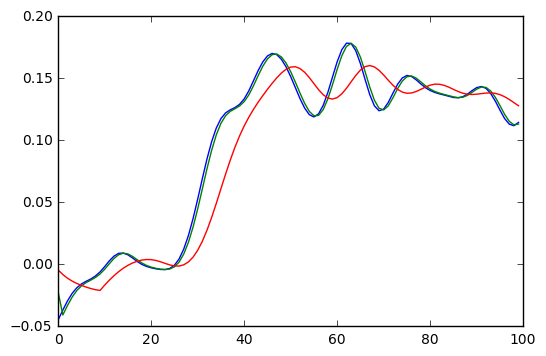

In [10]:
# how the signals compare for the first 100 samples?
plot(song1[0:100]) # blue
plot(song1_h1[0:100]) # green
plot(song1_h2[0:100]) # red

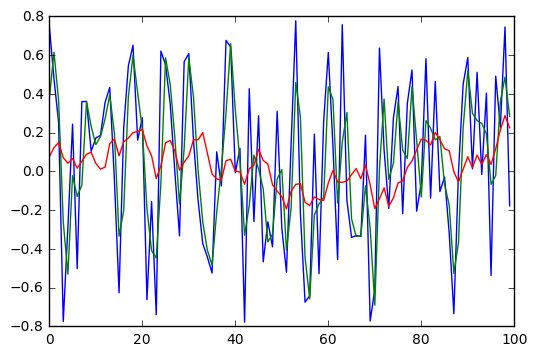

In [11]:
# how the noise signals compare for the first 100 samples?
plot(noise[0:100]) # blue
plot(noise_h1[0:100]) # green
plot(noise_h2[0:100]) # red

# A:

The relationship among the above slices of the 3 signals in both cases is such that: h1 is a slightly smoothed version of the original, with the highest frequencies (narrow peaks/throughs) being removed, whilst h2 is an even smoother verison, where it becomes obvious the smoothing is done by averaging a "window" of neighbouring samples. As a matter of fact, the randomly generated noise show a marked loss of energy (amplitude) in h2 due to the average of a group of random samples statistically tending to be 0.

### In general, what effects do convolving a sound with `h1` and `h2` seem to have on the waveforms?

A low-pass effect

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


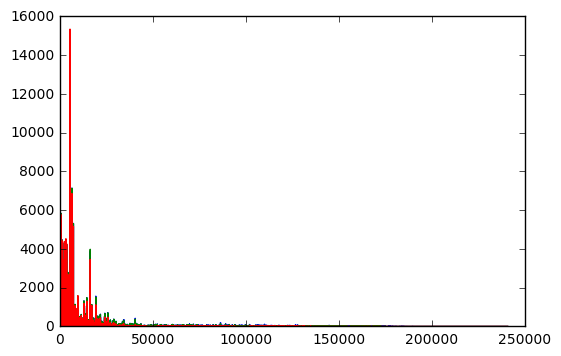

In [12]:
#Compute, plot and compare the spectra:
specS1 = abs(fft.fft(song1))
plot(specS1[0:size(specS1)/2])
specS1h1 = abs(fft.fft(song1_h1))
plot(specS1h1[0:size(specS1h1)/2])
specS1h2 = abs(fft.fft(song1_h2))
plot(specS1h2[0:size(specS1h2)/2])

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


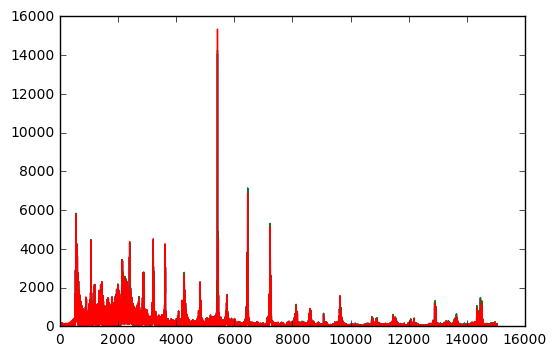

In [13]:
#Compute, plot and compare the spectra: (zoom)
plot(specS1[0:size(specS1)/32])
plot(specS1h1[0:size(specS1h1)/32])
plot(specS1h2[0:size(specS1h2)/32])

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


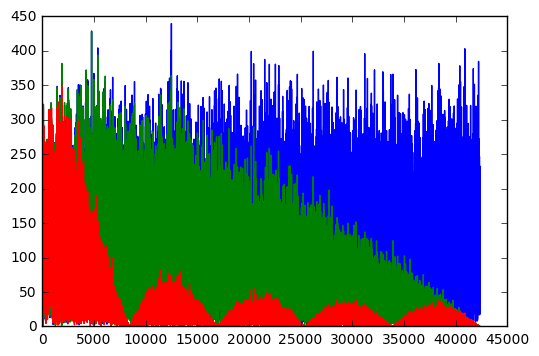

In [14]:
#Compute, plot and compare the spectra:
specN = abs(fft.fft(noise))
plot(specN[0:size(specN)/2])
specN1 = abs(fft.fft(noise_h1))
plot(specN1[0:size(specN1)/2])
specN2 = abs(fft.fft(noise_h2))
plot(specN2[0:size(specN2)/2])

In [15]:
# After looking at the above, what effects do convolving a sound with `h1` and `h2` seem to have on the spectra?

# A: Higher frequencies are attenuated (in noise_h2 there is also a particular pattern showing in how frequencies are cut)

## Part 2: Reasoning about filters h1 and h2 #

In [16]:
h1 = [0.5, 0.5] # we can think of this as a type of impulse response
x = [1, 2, 3,4,5]
convolution = convolve(x,h1)
print convolution

[ 0.5  1.5  2.5  3.5  4.5  2.5]


/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


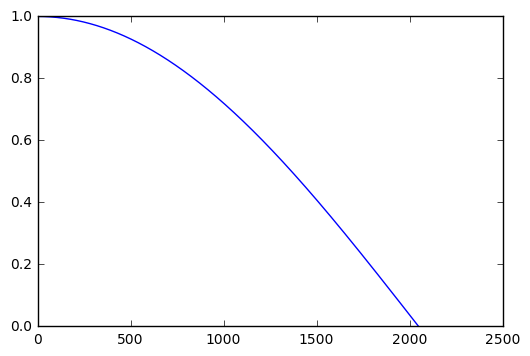

In [17]:
# filter spectrum => the shape of the cutoff
h1_padded = concatenate([h1,zeros(4094)])
spect_h1p = abs(fft.fft(h1_padded))
plot(spect_h1p[0: size(h1_padded)/2 ])

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


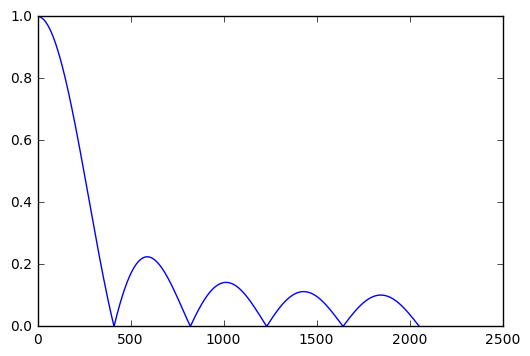

In [18]:
# filter spectrum (2) => the shape of the cutoff
h2_padded = concatenate([h2,zeros(4094)])
spect_h2p = abs(fft.fft(h2_padded))
plot(spect_h2p[0: size(h2_padded)/2 ])

In [19]:
# Note on the above: 
# filtering equals to multiplying the filter spectrum with the signal spectrum on a sample by sample basis
# ...Therefore, in general, convolving two signals will generate a new signal whose spectrum will be equivalent to the multiplied spectra of the originals


/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


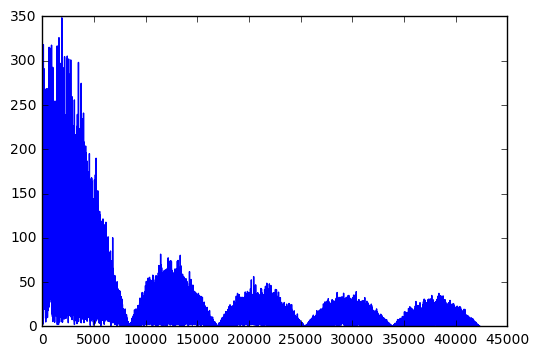

In [32]:
# Plot the spectrum of noise_h2
plot(specN2[0:size(specN2)/2])

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


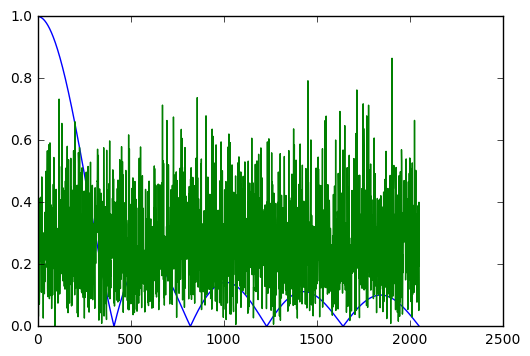

In [71]:
# plot the spectrum of noise (normalised) and the spectrum of h2
plot(spect_h2p[0: size(h2_padded)/2 ])
normalisedNoiseH2Spec = specN / max(abs(specN))
plot(normalisedNoiseH2Spec[0: size(h2_padded)/2])

# We can see how the spectrum of noise_h2 is the same as multiplying the spectra of noise and h2

### Convolving an input signal with an impulse response yields an output signal whose spectrum is equal to the input signal's spectrum multiplied bin-by-bin with the impulse response's spectrum!


-----  Notes on what Rebbecca said in the Lab:  ------

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


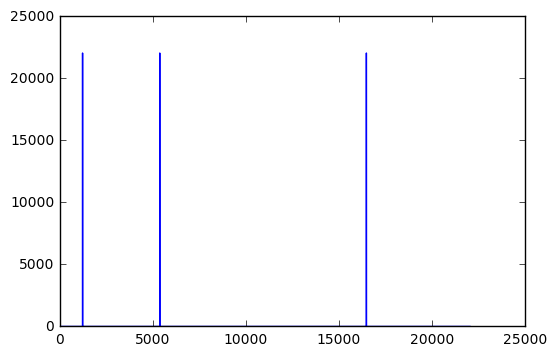

In [101]:
t = np.arange(0, 1, 1/44100)
sig = sin(2*pi*1217*t) + sin(2*pi*5367*t) + sin(2*pi*16476*t)
spec_sig = abs(fft.fft(sig))
plot(spec_sig[0: size(spec_sig)/2])

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


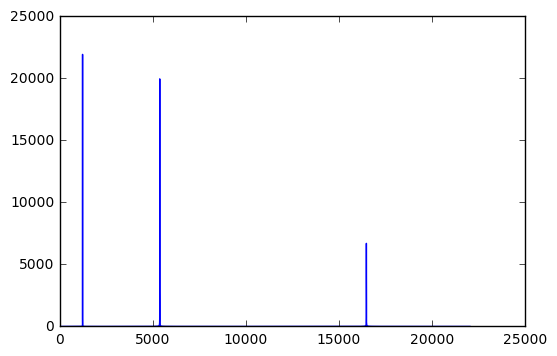

In [103]:
y = convolve(sig, h1)
specy = abs(fft.fft(y))
plot(specy[0: size(specy)/2])

In [106]:
sig200 = sin(2*pi*200*t)
play(sig200)
y200 = convolve(sig200, h1)
play(y200)

-----  End of notes  ------

### Part 3: Another filter
a. Create a new filter whose impulse response `h3` is [-1, 1].

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


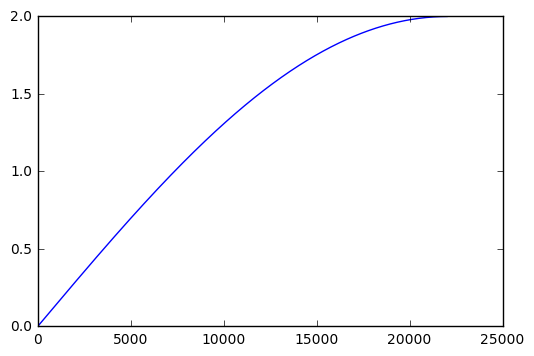

In [129]:
h3 = [-1,1] # impulse response
h3_pad = concatenate([h3, zeros(1022)]) # padding
spec_h3 = abs(fft.fft(h3_pad)) #calculate the system response (spectrum)
freqs3 = fftfreq(size(spec_h3), 1/44100) # calculate the frequency bands to correctly label the x-axis when plotting
plot(  freqs3[0:size(spec_h3)/2],    spec_h3[0:size(spec_h3)/2]  )

__ What kind of filter is h3? __
A high pass filter with a gain (the high half of the spectrum will be amplified whilst the low half will be progressively cut)

__ What do you think the perceptual effect of h3 will be on your sounds? __
Assuming a normalisation of the output (otherwise there might be clipping), the sound would be a gentle high-passed version of the sounds convolved. The perceptual effect would be that of the sound either coming from small speakers or the object whose sound is heard being less "massive" or more distant



/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


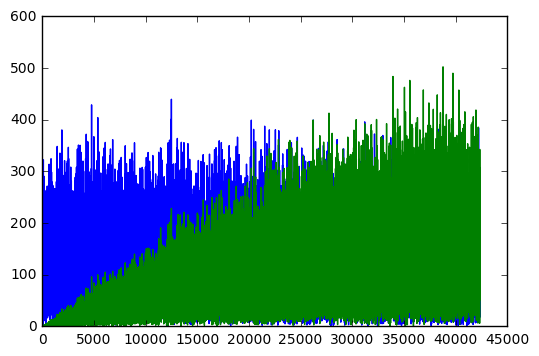

In [134]:
temp = convolve(noise,h3)
filtered_noise_h3 = temp/max(abs(temp))# normalise volume

play(noise)
play(filtered_noise_h3)

specN3= abs(fft.fft(filtered_noise_h3))
plot(specN[0:size(specN)/2])
plot(specN3[0:size(specN3)/2])


/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


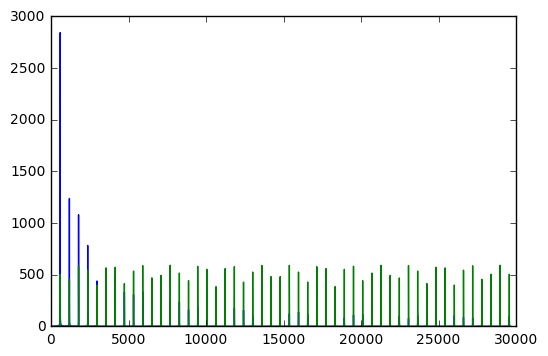

In [135]:
temp2 = convolve(saw,h3)
filtered_saw_h3 = temp2/max(abs(temp2))# normalise volume

play(saw)
play(filtered_saw_h3)

specSaw = abs(fft.fft(saw))
specFilteredSaw = abs(fft.fft(filtered_saw_h3))
plot(specSaw[0:size(specSaw)/2])
plot(specFilteredSaw[0:size(specFilteredSaw)/2])

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


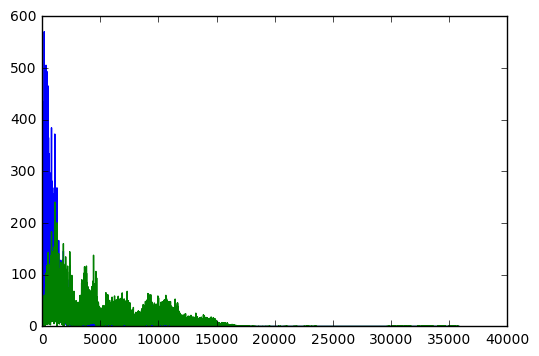

In [144]:
temp3 = convolve(robot,h3)
filtered_rob_h3 = temp3/max(abs(temp3))# normalise volume

play(robot)
play(filtered_rob_h3)

specFilteredRob = abs(fft.fft(filtered_rob_h3))
specRob = abs(fft.fft(robot))

plot(specRob[0:size(specRob)/2])
plot(specFilteredRob[0:size(specFilteredRob)/2])

## Extra Notes:

1. The spectrum of a system's impulse response is called its "frequency response." The magnitude of each bin in this spectrum tells us how that frequency will be scaled by the system, for any new input. 
2. We can also look at the __phase__ of each spectral bin, which tells us how much that frequency will be shifted in phase by the system, for any new input.
3. Python provides you built-in functions to plot the magnitude and phase responses for a filter. 

For instance the function `signal.freqz` computes the frequency response for a filter, which can easily be plotted.

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


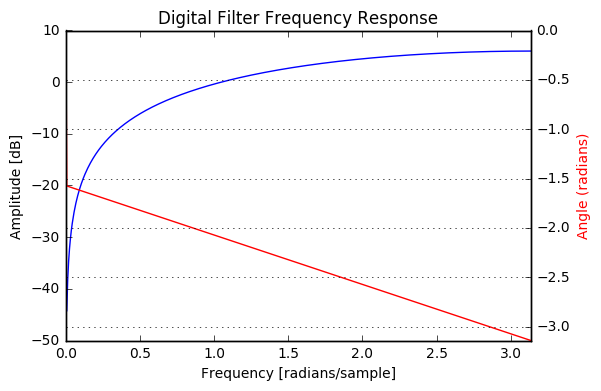

In [168]:
w, h = signal.freqz(h3)
graph = plt.figure() #call "figure" display function from 'plt' class
plt.title('Digital Filter Frequency Response') # define a title for our plot class


plt.plot(w, 20 * np.log10(abs(h)), 'b') #plot w(phrequency) in radians/sample along 'x' axis and h(amplitude) in dB along 'y'
plt.xlabel('Frequency [radians/sample]')
plt.ylabel('Amplitude [dB]')

# display phase (radians) as a red line on the graph (plotted along y)
ax1 = graph.add_subplot(111)
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'r')
plt.ylabel('Angle (radians)', color='r')
plt.grid()
plt.axis('tight')
plt.show()